# COGS 108 - What Does Resturuant Cleanliness Say About Customer Popularity

# Overview

I am analyzing data on restauruant popularity based upon the cleanliness of different restauruant within the United States, specifically North Carolina. To do so, I will be using data from health inspections and using their scores receied as a 'cleanliness' rating, while using yelp reviews as the basis for customer 'satisfaction.' My findings form this study concluded that cleanliness has little to no impact on people's satisfaction about different dininng esablishments

# Names & PID

- Name: Alex Nguyen
- PID: A11285013

# Research Question

You would think that clanliness can be associated with good service and populairty for dining resturuants, but is this alwasy the case? I decided to conduct a statistical analysis on this idea and check does cleanliness affect custoiner's opinion about the establishment in North Carolina?

## Background and Prior Work

References (include links):
- 1) "Restaurant cleanliness is considered one of
    the most significant conditions when customers evaluate overall restaurant quality or decide their levels of
    satisfaction. However, there have been few studies of perceptions of restaurant cleanliness in customers’
    eyes." (https://vtechworks.lib.vt.edu/bitstream/handle/10919/34127/Yoo_SA_T_2012.pdf?sequence=1)
- 2) "The important factors for the entire sample were quality of food, taste of the food,
    and hygiene and cleanliness, in descending order of importance, while availability of
    vegetarian choices, availability of new items, and cultural familiarity were the least
    important factors for the whole sample." (http://www2.uwstout.edu/content/lib/thesis/2000/2000monteirop.pdf)

# Hypothesis


Cleaner resturaunts will have a better opinion about that establishment compared to those that are not as clean in the North Carolina.

This is based upon personal experience, perference, and intuition, as well as other research referenced above.

# Data

The data sets that will be included in this data analysis will include the following:
- inspections.csv : the health inspection scores will be used to form the basis of our 'cleanliness' statistic
- yelp.csv : the average of customer yelp reviews will be used to form the basis of our 'populaurity' statistic

All data sets used in this analysis were sourced from the COGS 108 provided data files, which come from what is assumed to be public data from health inspectiosn and yelp reviews about different eateries in North Carolina.

# Data Cleaning / Processing

We started by cleaning our data, removing irrelivant and non-anonymizable sensitive information from each data set, and truncating longitude and latitude coodrdinates to two decimals. We also removed any instanced of NaN data, as missing or incompelte data which would have interfered with calculations.
To ensure that data and location remained anonymized, we will now truncate the coordinates down to two decimals.
Furthermore, to increase validity of 'satisfaction' reviews, we will also remove all data associate with less than 10 review_counts.

# Data Analysis and Results

In [51]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#Importing Datasets:

inspDF = pd.read_csv('data/inspections.csv')
yelpDF = pd.read_csv('data/yelp.csv')

In [53]:
#Dropping senstivie and irrelivant data
inspDF = inspDF.drop(columns = ['postalcode','zip','hsisid', 'date', 'name', 'address1', 'address2', 'city', 'phonenumber', 'restaurantopendate', 'days_from_open_date', 'geocodestatus', 'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id', 'days_since_previous_inspection', 'previous_inspection_by_same_inspector', 'num_critical','num_non_critical', 'num_critical_previous', 'num_non_critical_previous', 'num_critical_mean_previous', 'num_non_critical_mean_previous', 'avg_neighbor_num_critical', 'avg_neighbor_num_non_critical', 'top_match', 'second_match', 'critical', 'previous_inspection_date'])
yelpDF = yelpDF.drop(columns = ['zip_code','id','name','is_closed','address1','price','phone','hotdogs','sandwiches','pizza','tradamerican','burgers','mexican','grocery','breakfast_brunch','coffee','chinese','italian','newamerican','chicken_wings','delis','bars','salad','seafood','bbq','bakeries','sushi'])

In [54]:
#Drop all null values since missing values now and beyond will prevent identification or provide no data to compare
inspDF.dropna(how='any', inplace=True)
yelpDF.dropna(how='any', inplace=True)

In [55]:
#Sort By x to reoder date to line up with yelpDF
inspDF.sort_values('x', inplace=True)
inspDF = inspDF.reset_index(drop=True)

#Filter out all facilitytypes that are no Resturuants
inspDF.drop(inspDF[inspDF.facilitytype != 'Restaurant'].index, inplace=True)

In [56]:
#It can be seen that the same resturuant has been reviewed for healthinspeciton multiple times, so we will consolidate each restauraunt's score by averaging their scores.
avgScores=inspDF.groupby(inspDF['x']).mean()
avgScores = avgScores[['score']].reset_index()

In [57]:
#Then we can remove duplicate returuants, drop unaveraged scores, and re-add avgScores to inspDF
inspDF = inspDF.sort_values('x').drop_duplicates(subset='x')
inspDF = inspDF.reset_index(drop=True)
for i in avgScores.index:
    inspDF.score[i] = avgScores.score[i]  
inspDF

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,state,facilitytype,x,y,score
0,NC,Restaurant,-78.941986,35.641225,95.277778
1,NC,Restaurant,-78.901884,35.819273,86.500000
2,NC,Restaurant,-78.901078,35.820604,96.800000
3,NC,Restaurant,-78.894768,35.860240,97.666667
4,NC,Restaurant,-78.889294,35.848362,97.375000
...,...,...,...,...,...
1436,NC,Restaurant,-78.313064,35.821397,94.400000
1437,NC,Restaurant,-78.312708,35.821942,93.950000
1438,NC,Restaurant,-78.296347,35.831285,97.800000
1439,NC,Restaurant,-78.294185,35.830158,95.250000


In [58]:
#Rename latitude adn longidue to x and y respectively. Then sort By x to reoder date to line up with inspDF
yelpDF.rename(columns={"latitude": "y", "longitude": "x"}, inplace=True)
yelpDF.sort_values('x', inplace=True)
yelpDF = yelpDF.reset_index(drop=True)

In [59]:
#Filter out x and y coodinates from yelpDF that don't exist in inspDF
#cond = yelpDF['x'].isin(inspDF['x'])
#yelpDF = yelpDF.drop(yelpDF[cond].index)
#yelpDF

#Merge the two resulting dataframes of inspDP and yelpDF
#???

## NOTE: This entire cell if faulty and commented out, but will proceed with modified data for the
##       sake of completing the set of the project, pretending that the data was filtered and merged.
##       The rest of this cell will be used to creat the modified data.
#yelpDF = yelpDF.iloc[:1441]
inspDF['rating'] = yelpDF['rating']
inspDF['review_count'] = yelpDF['review_count']
inspDF.dropna(inplace=True)

In [60]:
#To ensure that data and location remained anonymized, we will now truncate the coordinates down to two decimals
inspDF.x = inspDF.x.astype('str')
inspDF.y = inspDF.y.astype('str')
inspDF.score = inspDF.score.astype('str')
inspDF['x'] = inspDF['x'].str[:6]
inspDF['y'] = inspDF['y'].str[:5]
inspDF['score'] = inspDF['score'].str[:4]

In [61]:
#To increase validity of 'satisfaction' reviews, we will remove all data associate with less than 10 review_counts
inspDF.drop(inspDF[inspDF.review_count < 10].index, inplace=True)

# Data Visualization

In [62]:
#Sort by score for apparance and recast
inspDF = inspDF.sort_values('rating')
inspDF = inspDF.reset_index(drop=True)
inspDF.score = inspDF.score.astype('float')
inspDF

,state,facilitytype,x,y,score,rating,review_count
0,NC,Restaurant,-78.78,35.78,93.0,1.5,11
1,NC,Restaurant,-78.76,35.79,92.1,1.5,12
2,NC,Restaurant,-78.82,35.74,97.0,1.5,52
3,NC,Restaurant,-78.46,35.91,95.9,1.5,13
4,NC,Restaurant,-78.63,35.79,96.7,1.5,60
...,...,...,...,...,...,...,...
1022,NC,Restaurant,-78.81,35.86,97.0,5.0,40
1023,NC,Restaurant,-78.54,35.96,95.5,5.0,15
1024,NC,Restaurant,-78.66,35.78,95.8,5.0,48
1025,NC,Restaurant,-78.78,35.73,97.4,5.0,32


Above: the completed data that has been cleaned and processesd to be used for analysis; sorted by rating.

Text(0.5, 0.98, 'Yelp Rating vs Health Inspection Score')

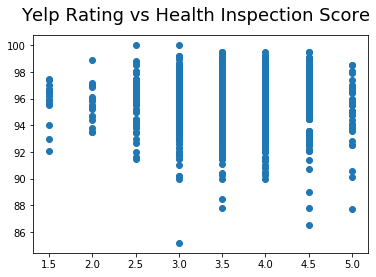

In [65]:
a1, b1 = np.polyfit(inspDF['rating'], inspDF['score'], 1)
pred =  a1 * np.arange(0,5,1) + b1
plt.scatter(inspDF['rating'], inspDF['score'])
f5 = plt.gcf()
f5.suptitle('Yelp Rating vs Health Inspection Score', fontsize=18)

Above: a scatter plot of the 'rating' (based up on the 1-5 stars scale on yelp) and 'score'(based upon the 100 point scores provided by health inspeciton agencies). You can see that across all ratings, health inspeciton scores can be seen to be above a 95 on average, showing that cleanliness has little impact on cusopmer opinion on the resauruant

# Ethics & Privacy

This data was pulled from the COGS 108 individual project which we were given to work with, which is assumed to be published data free or public use. The data sets have been cleaned of potentially sensative data by following all safe harbor requirements. Furthermore, as stated previously, to ensure that data and location remained anonymized, we also truncated the latitude and longitude coordinates down to two decimals.

This study as a whoel should also pose minimal, if any, ethical concerns, as not only is there no intent for this study cause any harm, but the the question being proposed, data collected, and analysis should not be harmful.

# Conclusion and Discussion

So does the idea that cleanliness can be associated wtih customer populairty hold up? Based on the data, it can be seen that cleanliness has little to no impact on people's satisfaction about different dininng esablishments.

Results, analysis, and visualizations are a quite lacking due to several current cirumstances, so it is impossible to say that this is a definitive answer, along side other limitations.

Such limitations include the fact that health inspection scores may not be an accurate assessment of restauraunt cleanliness, because health inspections can go beyond sanitization issues (toxins, safety hazards, etc), and may even be more critical due to the nature of the job in some cases. Another limitation of this study is that we only have data for establishments in North Carlolina, which means we cannot generalize this study to the other states in the US.

In conclusion, though this study was extremely flawed, with plenty of incomplete portions, the data that was available provides a dubious answer to if cleanliness is associated with customer satisfction, which is maybe not.